# Main tutorials followed

## Object tracking
https://towardsdatascience.com/object-detection-and-tracking-in-pytorch-b3cf1a696a98

## Yolo training
https://towardsdatascience.com/training-yolo-for-object-detection-in-pytorch-with-your-custom-dataset-the-simple-way-1aa6f56cf7d9

## Main repo used for training
https://github.com/mariontan/PyTorch-YOLOv3

this one has a better implementation as it does validation on the model some changes are addded _try except_ in test.py and YoloTrain.py so it will procees even if ValueError is encountered

# It is absolutely important to leave a new line in coco.names
sample file

car
truck \n
(press enter so a new line will appear or else errors will occur)

# Train Test Split

This script is for splitting the training data set for training and validation sets

Variables to adjust

_Yolo_\__dir_-folder just before the images folder of the data set

_split_\__pct_ - 10 percentage to split the data set

In [24]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 24 16:13:34 2020

@author: AIC-WS1
"""

import glob
import os
import numpy as np
import sys
#current_dir = "./data/artifacts/images"
#current_dir = r'D:/Ivan/Test_data/YoloV3_Data/Yolo_training/vehicles/images'
'''
only change this line direct to correct folder before the images folder
'''
Yolo_dir = r"D:/Ivan/Test_data/IvanMadeDataSet/Yolo_2_class_car_truck_combined/front"
#Yolo_dir = r"D:/Ivan/Test_data/IvanMadeDataSet/Yolo_front/front"

current_dir = Yolo_dir+"/images"
split_pct = 10  # 10% validation set
file_train = open(Yolo_dir+"/train.txt", "w")  
file_val = open(Yolo_dir+"/val.txt", "w")  
counter = 1  
index_test = round(100 / split_pct)  
for fullpath in glob.iglob(os.path.join(current_dir, "*.JPG")):  
  title, ext = os.path.splitext(os.path.basename(fullpath))
  if counter == index_test:
    counter = 1
    file_val.write(current_dir + "/" + title + '.jpg' + "\n")
  else:
    file_train.write(current_dir + "/" + title + '.jpg' + "\n")
    counter = counter + 1
file_train.close()
file_val.close()

# Check files if annotated

In [12]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 24 16:13:34 2020

@author: AIC-WS1
"""

import glob
import os
import numpy as np
import sys
from shutil import copyfile
#current_dir = "./data/artifacts/images"
#current_dir = r'D:/Ivan/Test_data/YoloV3_Data/Yolo_training/vehicles/images'
'''
only change this line direct to correct folder before the images folder
'''
image_dir = r"D:\Ivan\Test_data\IvanMadeDataSet\Yolo_2_class_truck\organized\front"
path = r"D:\Ivan\Test_data\IvanMadeDataSet\Yolo_2_class_truck\organized"
files = os.listdir(image_dir)
#Yolo_dir = r"D:/Ivan/Test_data/IvanMadeDataSet/Yolo_front/front"
for file in files:
    item = file[:-4]+'.txt'
    copyfile(path+'\yoloV3Labels/'+item, path+'/copiedLabels/'+item)

In [21]:
path = r"D:\Ivan\Test_data\IvanMadeDataSet\Yolo_2_class_truck\organized\yoloV3Labels/"
files = os.listdir(path)

for file in files:
    with open(path+file[:-4]+'.txt') as f:
        lines = f.readlines()
        for line in lines:
            if(len(line)==0):
                print(len(line))

In [23]:
import os
image_path = r"D:\Ivan\Test_data\IvanMadeDataSet\Yolo_2_class_truck\organized\front/"
labels_path = r"D:\Ivan\Test_data\IvanMadeDataSet\Yolo_2_class_truck\organized\yoloV3Labels/"
files = os.listdir(image_path)


for index, file in enumerate(files):
    os.rename(os.path.join(image_path, file), os.path.join(image_path, ''.join(['trck',str(index), '.jpg'])))
    os.rename(os.path.join(labels_path, file[:-4]+'.txt'), os.path.join(labels_path, ''.join(['trck',str(index), '.txt'])))

# Getting the area per image

generates a histogram of the distributions

variables to change

_path_ - path of the pictures folder

tip change the if statements to get a clearer picture of the distribution

In [ ]:
import os

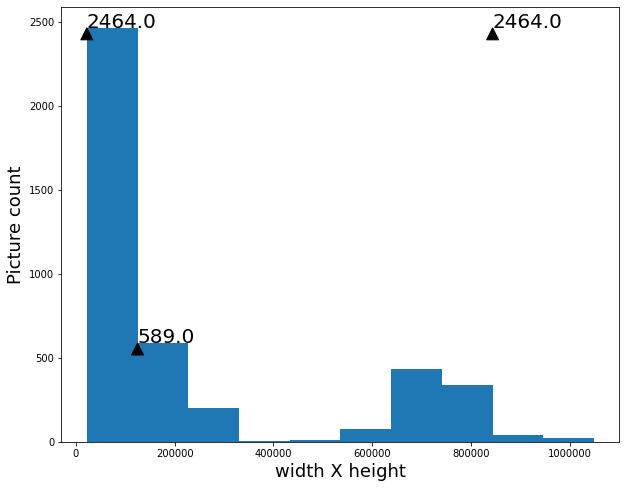

mean: 228139.51053639848
min: 22500
max: 1048576
length:  4176
[2464.  589.  201.    7.    8.   76.  431.  337.   38.   25.]
[  22500.   125107.6  227715.2  330322.8  432930.4  535538.   638145.6
  740753.2  843360.8  945968.4 1048576. ]


In [19]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 17 10:27:20 2020

@author: AIC-WS1
"""

#!/usr/bin/python
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

path=r'D:\Ivan\Test_data\IvanMadeDataSet\Yolo_front_new_cleaner\front\images/'
dirs = os.listdir(path)

areaArr = []
area1 = []
area2 = []
area3 = []
area4 = []
area5 = []


def pixelPerImage():
    for item in dirs:
        if os.path.isfile(path+item):
#            print(item)
            im = Image.open(path+item)
            
            width, height = im.size
            area = width*height
            areaArr.append(area)
#            if(area<75000):
#                area1.append(area)
#            elif(area>=780000 and area<=789000):
#                area2.append(area)
#            elif(area>=75000 and area<=158000):
#                area3.append(area)
#            elif(area>=158000 and area<=300000):    
#                area4.append(area)
            if(area<=250000):
                area5.append(area)
#            else:
#                areaGreater100K.append(area)
pixelPerImage()

selectedArr =  np.array(areaArr)
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.ticklabel_format(useOffset=False, style='plain')
y, x, _ = plt.hist(selectedArr)

ax.annotate(y.max(), xy=(x[8], y.max()), xytext=(x[8], y.max()),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20
            )
label2=y[1]
ax.annotate(label2, xy=(x[1], label2), xytext=(x[1], label2),
            arrowprops=dict(facecolor='black', shrink=0.05),fontsize=20
            )
label3=y[0]
ax.annotate(label3, xy=(x[0], label3), xytext=(x[0] , label3),
            arrowprops=dict(facecolor='black', shrink=0.05),fontsize=20
            )
plt.xlabel('width X height',fontsize=18)
plt.ylabel('Picture count',fontsize=18)
plt.show()
print('mean:',selectedArr.mean())
print('min:',selectedArr.min())
print('max:',selectedArr.max())
print('length: ',len(selectedArr))

print(y)
print(x)

# Rename Files

for batch renaming of files

Variables to Change

_path_ - path of the pictures folder or text folder

In [ ]:
import os
path = r'D:\Ivan\Test_data\IvanMadeDataSet\Yolo_Cars_Front_SlightSide_View\train\1'
files = os.listdir(path)


for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, ''.join(['car',str(index), '.jpg'])))

# Converting YoloV3 labels to VOC labels

scripts used for data augmentation. to make YoloV3 data set comapatible with 
https://github.com/mariontan/DataAugmentationForObjectDetection

from YoloV3 label to VOC label 

YOLOv3 annotation format https://medium.com/@vinay.dec26/yat-an-open-source-data-annotation-tool-for-yolo-8bb75bce1767 

https://github.com/mariontan/OIDv4_ToolKit for label format of this repo

Variables to change

_path_ - folder just before the image and label folder

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 23 09:34:22 2020

@author: AIC-WS1
"""

import os
import numpy as np
import cv2 

path = r'D:\Ivan\Test_data\IvanMadeDataSet\OID_Truck_Data_Augmentation/'
path_label = path + 'label/'
path_image = path + 'image/'
files = os.listdir(path_label)

def convertYolov3Label(path_image,path_label,file,folder):
    img = cv2.imread(path_image+file[:-4]+'.jpg')[:,:,::-1]
    Y, X, _ = img.shape
    label = np.array([[0,0,0,0,0]])
    with open(path_label+file[:-4]+'.txt') as f:
        lines = f.readlines()
        for line in lines:
                line = line[:-2].split(' ')
                x_1 = (float(line[1])*X)-((float(line[3])*X)/2)
                y_1 = (float(line[2])*Y)-((float(line[4])*Y)/2)
                x_2 = (float(line[1])*X)+((float(line[3])*X)/2)
                y_2 = (float(line[2])*Y)+((float(line[4])*Y)/2)
                cls = 1
                label = np.append(label,[[x_1,y_1,x_2,y_2,cls]],axis = 0)
    np.savetxt(folder+file[:-4]+'.txt',label[1:], delimiter=' ', fmt='%f')
    
folder = path+'convertedYolov3Label/'
if not os.path.exists(folder):
    os.mkdir(folder)
for file in files:
    convertYolov3Label(path_image,path_label,file,folder)

# Move label to end

scripts used for data augmentation. to make YoloV3 data set comapatible with 
https://github.com/mariontan/DataAugmentationForObjectDetection

after _convertYolov3Label_ is run
Variables to change

_path_ - folder just before the image and label folder

In [ ]:
import os

path = r'D:\Ivan\Test_data\IvanMadeDataSet\OID_Truck_Data_Augmentation/'
path_label = path + 'label/'
path_image = path + 'image/'
files = os.listdir(path_label)


for file in files:
    labels = []
    with open(path_label+file) as f:
        lines = f.readlines()
    for line in lines:
        label = line.replace('Truck ','')
        labels.append(label[:-2]+ ' 1\n')
    print(labels)
    with open(path_label+file, "w") as f:
        f.writelines("".join(labels))
    f.close()


# Write label to start

after data augmentation is ran move labels back to start so _convert\_annotaions.py_ will work see repo: https://github.com/mariontan/OIDv4_ToolKit

variables to change:

_path_ = folder just before the image and label folder

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 22 11:14:09 2020

@author: AIC-WS1
"""

import os

path = r'D:\Ivan\Developer\OIDv4_ToolKit-master\OID\Dataset\train\Truck\Label/'
files = os.listdir(path)


for file in files:
    labels = []
    with open(path+file) as f:
        lines = f.readlines()
    for line in lines:
        label = line.replace(' 0.000000','')
        labels.append('0 '+label)
        print('0 '+label)
    with open(path+file, "w") as f:
        f.writelines("".join(labels))
    f.close()


# Count number of annotation for entire dataset

counts the number of annotations per image

In [1]:
import os
#2080 trucks pictures so far July 23, 2020
path = r'D:\Ivan\Test_data\IvanMadeDataSet\Yolo_front_truck_car_oneclass\front\labels/'
files = os.listdir(path)

cnt = 0 
for file in files:
    labels = []
    with open(path+file) as f:
        lines = f.readlines()
    for line in lines:
        cnt = cnt +1
    f.close()
print(cnt)

5955


# Transfering files
Use this if you want to trasfer pics that have been cleaned already.
Ex. Researcher A asks Reasercher B to annotate a set of picture. But the annotation of pictures takes weeks. To speed up data cleaning Researcher A can ask for the already annotated dataset and start cleaning. This script is used by researcher A to transfer pic he is done cleaning


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 31 13:39:34 2020
@author: AIC-WS1
"""

import os
from shutil import copyfile


path = r'D:\Project_Fiber_2019\Picam_MachineLearning\DataSet\Katipunan\front-complete\front'
labels_folder = r'D:\Project_Fiber_2019\Picam_MachineLearning\DataSet\Katipunan\front-40%done\forboxing\1_Copy'
image_folder = r'D:\Project_Fiber_2019\Picam_MachineLearning\DataSet\Katipunan\front-complete\alreadyChecked' 

#files = os.listdir(path)
original_files = os.listdir(labels_folder)

for index, file in enumerate(original_files):
    filename = (path+'/'+file)[:-4]+'.jpg'
    labelName = (path+'\yoloV3Labels/'+file)[:-4]+'.txt'
    try:
        if os.path.isfile(filename):
            copyfile(filename, os.path.join(image_folder ,file[:-4]+'.jpg'))
#             os.rename(filename, os.path.join(image_folder ,file[:-4]+'.jpg'))
        if os.path.isfile(labelName):
            copyfile(labelName, os.path.join(image_folder+'\labels' ,file[:-4]+'.txt'))
#             os.rename(labelName, os.path.join(image_folder+'\labels' ,file[:-4]+'.txt'))
    except:
        print('can not trasfer',file)
        
#os.rename(os.path.join(path, file), os.path.join(path, ''.join(['car',str(index), '.jpg'])))

# Convert from HEIC


In [4]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 17 10:27:20 2020

@author: AIC-WS1
"""

#!/usr/bin/python
from PIL import Image
import os, sys
from shutil import copyfile

path = r"D:\Ivan\Test_data\IvanMadeDataSet\Yolo_2_class_truck\organized\front/"
#path = r"D:/Ivan/Test_data/IvanMadeDataSet/Stanford_AI_cars_modified/test/buses/"
dirs = os.listdir( path )
if not os.path.exists(path+'heicPics'):
    os.mkdir(path+'heicPics')

if not os.path.exists(path+'resized/'):
    os.mkdir(path+'resized/')
#aspect ratio width:height
def resize():
    for item in dirs:
        try:
            if os.path.isfile(path+item):
                x=item
#                 im = Image.open(path+item)
                
#                 width, height = im.size
#                 if width > 600 or height > 600:
#                     aspectRatio = width/height
#                     width = 600
#                     height = int(width/aspectRatio)
                
#                 f, e = os.path.splitext(path+'resized/'+item)
#                 imResize = im.resize((width,height), Image.ANTIALIAS).convert('RGB')
#                 imResize.save(f + '.jpg', 'JPEG', quality=90)
        except OSError:
            print(item)
            copyfile(path+item, path+'heicPics/'+item)

resize()

